In [15]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize, fsolve
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('default')
import copy
from consts import *
fontsize = 15
def cal_area(r1, r2):
    return np.pi * (r2**2 - r1**2)

r1 = 0.0053
r2 = 0.0063
r3 = 0.0101
r4 = 0.0111
area_in = cal_area(r1, r2)
Jz_in = 100 / area_in
area_out = cal_area(r3, r4)
Jz_out = 100 / area_out
print(Jz_in, Jz_out)
mu0 = 1.257*10**-6# H/m
mu2 = mu4 = 1
mu3 = 10
x_12 = np.linspace(r1, r2, 100)
x_23 = np.linspace(r2, r3, 100)
x_34 = np.linspace(r3, r4, 100)

2744050.7429637127 1501461.7272820305


# B (r1, r2)

4.844502220495115e-05
0.0 3.1755200550240064


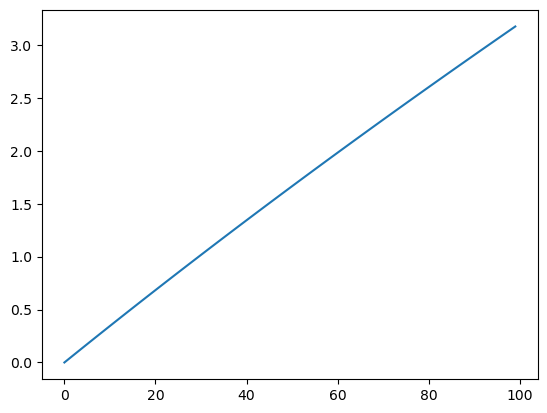

In [30]:
Jz2 = Jz_in
def solve_B02():
    B02_ = 0.5 * mu2 * mu0 *  Jz2 * r1**2
    return(B02_)

B02 = solve_B02()
print(B02)
def B2(r):
    B2_val = -B02/r + 0.5 * mu2 * mu0* Jz_in * r
    return B2_val * 1000

B2_val = B2(x_12)
plt.plot(B2_val)

print(B2_val[0], B2_val[-1])

# B (r2, r3)

-0.0002000577634665124
31.755200550240065 19.807699353120043


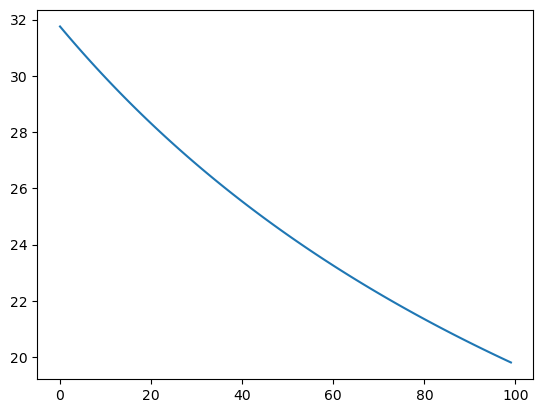

In [31]:
Jz3 = 0
def solve_B03():
    B03_ = -B2_val[-1]/1000 * mu3/mu2 * r2
    return(B03_)

B03 = solve_B03()
print(B03)
def B3(r):
    B3_val = -B03/r 
    return B3_val * 1000

B3_val = B3(x_23)
plt.plot(B3_val)

print(B3_val[0], B3_val[-1])

# B (r3, r4)

-0.00012833639619356754
3.1755200550240055 1.087114973792002


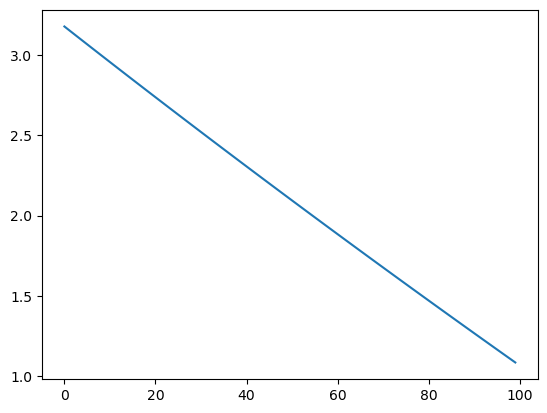

In [34]:
Jz4 = -Jz_out
def solve_B04():
    # at r3
    B04_ = -B3_val[0]/1000 * mu4/mu3 * r3 + 0.5 * mu4 * mu0 * Jz4 * r3**2
    return(B04_)

B04 = solve_B04()
print(B04)
def B4(r):
    B4_val = -B04/r + 0.5 * mu4 * mu0* Jz4 * r
    return B4_val * 1000

B4_val = B4(x_34)
plt.plot(B4_val)

print(B4_val[0], B4_val[-1])

# A (r3, r4)

-0.0006357524672465922
2.113310497463825 4.0657581468206416e-14


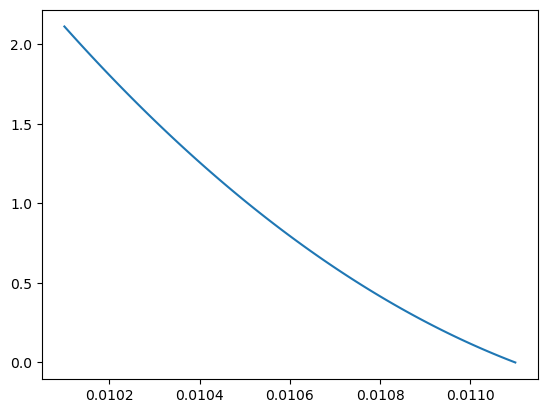

In [38]:
def solve_A04(r):
    A04= -B04* np.log(r) + (1/4) * mu4 * mu0 * Jz4 * r**2 
    return A04
    
A04 = solve_A04(r4)
print(A04)

def A4_func(r):
    A4 = A04 + B04* np.log(r) - (1/4) * mu4 * mu0* Jz4 * r**2
    return A4 * 1e6

A4_val = A4_func(x_34)
plt.plot(x_34, A4_val)    
print(A4_val[0], A4_val[-1])